In [1]:
import zarr
import allel
import seaborn as sns
import umap
import matplotlib.pyplot as plt
from ag3 import release_data

In [2]:
ag3 = release_data()

In [3]:
def umapper(pops):
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    print(ac['allele_counts_pca_ready'][:].shape)
    
    sns.set(style='white', context='paper', font_scale=1.2)
    sns.set(style='ticks')
            
    reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=.99, metric='euclidean')
    embedding = reducer.fit_transform(ac['allele_counts_pca_ready'][:].T)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(embedding[:, 0], embedding[:, 1],
           edgecolor='w', s=50)

(40862, 368)


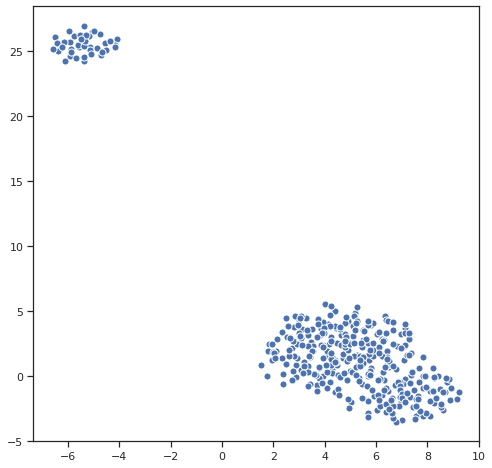

In [18]:
umapper('arab')

(81239, 2415)


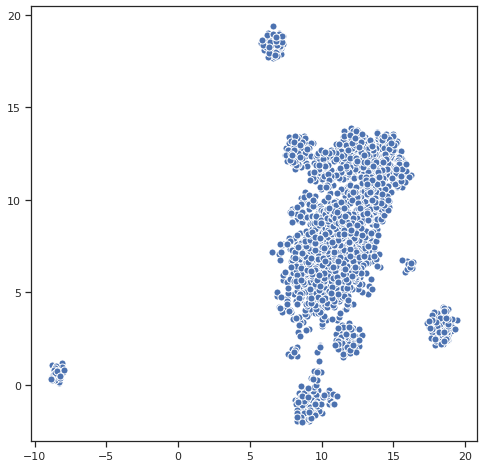

In [19]:
umapper('gamb_colu')

(81901, 2784)


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1157: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


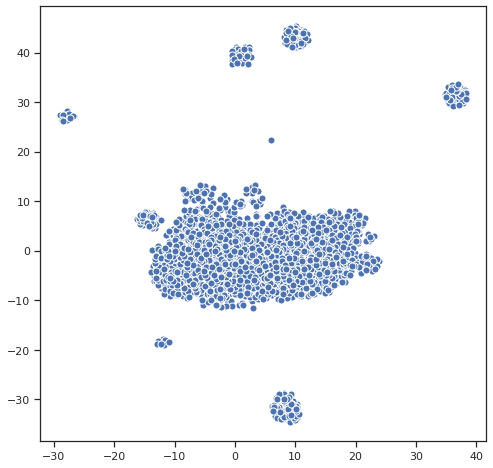

In [45]:
umapper('gamb_colu_arab')

## Downsample populations

Downsample larger populations to give a more balanced view.

In [17]:
# or load all samplesets
meta = ag3.load_sample_set_metadata(ag3.all_wild_sample_sets, True)
meta.sample_set.value_counts()

AG1000G-CM-A    303
AG1000G-TZ      300
AG1000G-UG      290
AG1000G-GN-B    185
AG1000G-BF-A    181
AG1000G-GM-C    174
AG1000G-BF-B    102
AG1000G-GW      101
AG1000G-GH      100
AG1000G-CM-B     97
AG1000G-KE       86
AG1000G-AO       81
AG1000G-CI       80
AG1000G-CD       76
AG1000G-GM-A     74
AG1000G-MZ       74
AG1000G-CF       73
AG1000G-ML-B     71
AG1000G-GA-A     69
AG1000G-ML-A     60
AG1000G-GN-A     45
AG1000G-CM-C     44
AG1000G-MW       41
AG1000G-GM-B     31
AG1000G-FR       23
AG1000G-BF-C     13
AG1000G-GQ       10
Name: sample_set, dtype: int64

In [16]:
ag3._all_sample_sets.pop()
pop_ids = ag3._all_sample_sets

In [18]:
pop_ids

['AG1000G-AO',
 'AG1000G-BF-A',
 'AG1000G-BF-B',
 'AG1000G-BF-C',
 'AG1000G-CD',
 'AG1000G-CF',
 'AG1000G-CI',
 'AG1000G-CM-A',
 'AG1000G-CM-B',
 'AG1000G-CM-C',
 'AG1000G-FR',
 'AG1000G-GA-A',
 'AG1000G-GH',
 'AG1000G-GM-A',
 'AG1000G-GM-B',
 'AG1000G-GM-C',
 'AG1000G-GN-A',
 'AG1000G-GN-B',
 'AG1000G-GQ',
 'AG1000G-GW',
 'AG1000G-KE',
 'AG1000G-ML-A',
 'AG1000G-ML-B',
 'AG1000G-MW',
 'AG1000G-MZ',
 'AG1000G-TZ',
 'AG1000G-UG']

In [ ]:
def downsample(n=50):
    idxs = []
    for pop in pop_ids:
        pop_idxs = df_samples[df_samples.population == pop].index.values
        if len(pop_idxs) > n:
            pop_idxs = np.random.choice(pop_idxs, size=n, replace=False)
        idxs.extend(pop_idxs)
    # randomly shuffle for better plotting
    np.random.shuffle(idxs)
    return idxs

# colours?